# Project 1

Report is in pdf document.

In [1]:
!pip install scikit-image

## 0.0 Import

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import random
from scipy import stats
import seaborn as sns 
import os
from PIL import Image
import skimage
from skimage import data,filters
import cv2

## 1.1 Random number generation 

### 1.1.1 Generate two types (1D, 2D) of random numbers with 1,000 samples, you may use the   rand() function or np.random.randn() in python .Only use python or matlab as your programming language.

The randn function returns one or a set of samples with a standard normal distribution.

In [3]:
D1 = np.random.randn(1000) 
D2 = np.random.randn(1000,2) 

In [4]:
print(D1)
print(D2)

[ 5.52097622e-01  1.26796595e+00  5.08160901e-01 -1.23318437e+00
 -8.82049482e-01  2.95100801e-01  8.35973278e-01 -9.10941577e-01
  1.68668156e+00  1.38608815e+00  2.82483287e-02 -1.03315019e+00
  4.08282542e-02 -6.94164213e-02 -7.31991309e-01 -1.35150655e-01
 -5.20398376e-01  1.00050627e+00  1.26582671e+00  4.99713402e-01
 -1.74211188e-01  6.36858798e-02 -1.40455309e+00  3.10154213e-02
  4.20257042e-02  1.67942240e+00  1.96126656e+00 -1.45278322e-01
 -1.07924306e+00 -3.24575115e-01 -4.37381034e-02  4.40859540e-01
  1.21240120e+00 -1.07648459e+00  1.21307149e+00 -1.33824414e+00
 -1.79417740e+00 -9.57744464e-01 -2.02512684e-01  2.46978263e+00
 -4.36036230e-01 -5.36809873e-02  5.21508991e-01 -1.34951345e+00
  1.14857336e+00 -5.17764089e-01 -7.87405847e-01 -5.97181698e-01
 -7.84343898e-02  5.24040677e-01  1.63695165e-01 -7.91426710e-01
  3.76349315e-01 -4.29811441e-01  7.48751173e-02  1.36736855e+00
 -5.08707749e-01  6.05621903e-01  3.93035697e-01  1.13025886e-01
 -2.25412140e-01 -3.31068

### 1.1.2 Visualize the generated samples, you may use a scatterplot.

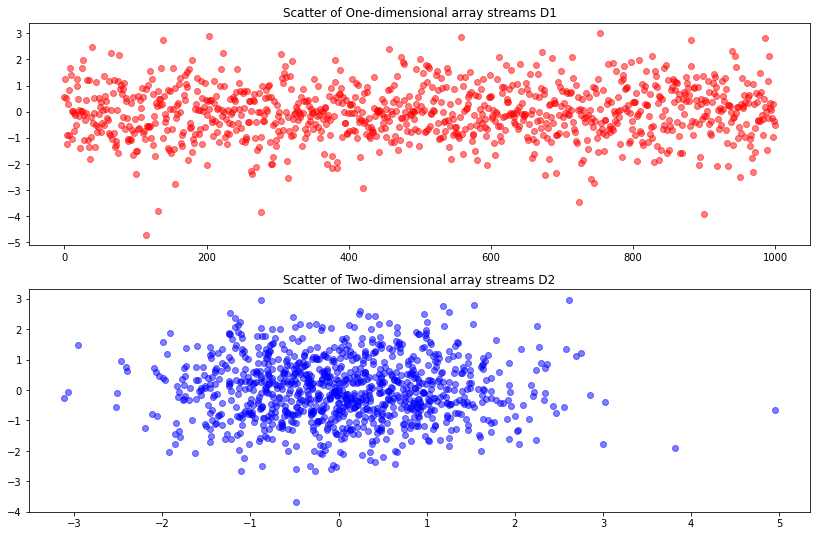

In [5]:
plt.figure(figsize=(14,9))

plt.subplot(211)
n = np.arange(0,1000,1)
plt.scatter(n, D1, c="r",alpha=0.5)
plt.title('Scatter of One-dimensional array streams D1')

plt.subplot(212)
plt.scatter(D2[:,0], D2[:,1], c="b",alpha=0.5)
plt.title('Scatter of Two-dimensional array streams D2')

plt.show()

### 1.1.3 Compute the histogram of the 1D and 2D data, then normalize them.

The 1000 samples were divided into 25 groups, the x-axis is the size of the data, and the y-axis is the number of occurrences, original data in histogram:

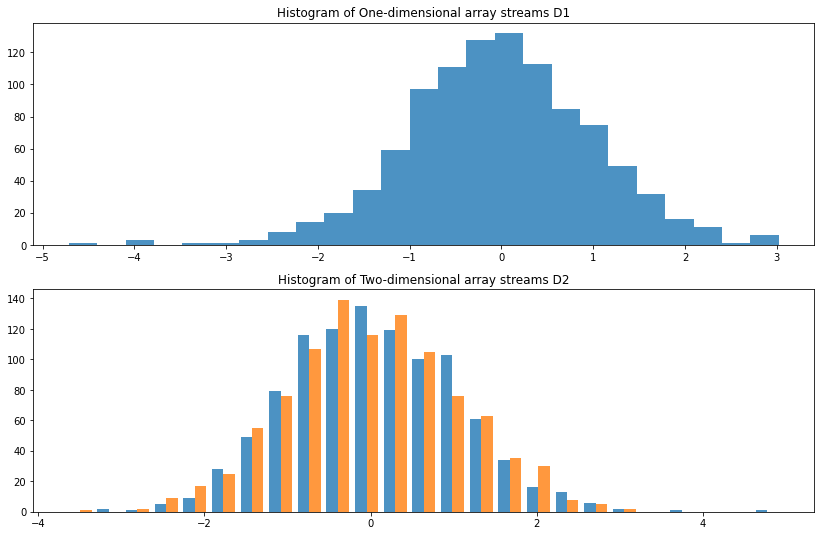

In [6]:
plt.figure(figsize=(14,9))

plt.subplot(211)
plt.hist(D1,bins=25,histtype="bar",alpha=0.8)
plt.title('Histogram of One-dimensional array streams D1')

plt.subplot(212)
plt.hist(D2,bins=25,histtype="bar",alpha=0.8)
plt.title('Histogram of Two-dimensional array streams D2')

plt.show()

Do normalize by min-max in (0，1):

Text(0.5, 1.0, 'Histogram of normalize_D2')

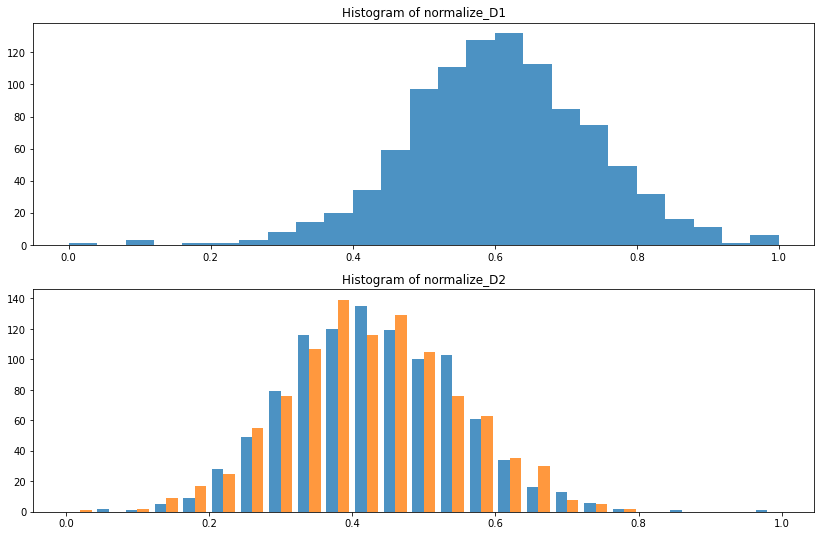

In [7]:
normalize_D1 = (D1 - D1.min())/(D1.max()-D1.min())
normalize_D2 = (D2 - D2.min())/(D2.max()-D2.min())

plt.figure(figsize=(14,9))

plt.subplot(211)
plt.hist(normalize_D1,bins=25,histtype="bar",alpha=0.8)
plt.title('Histogram of normalize_D1')

plt.subplot(212)
plt.hist(normalize_D2,bins=25,histtype="bar",alpha=0.8)
plt.title('Histogram of normalize_D2')

After normalize, through the x-axis we can see that the distribution of data sizes is converted to between (0,1), and the shape is roughly unchanged.

### 1.1.4 Visualize the pdf’s of the 1D streams. Are the samples uniformly distributed? Do the pdf’s represent a standard uniform distributions? Comment.

Visualize pdf’s of the 1D streams similar like histogram, which divided 1000 samples into 25 groups, but here's the difference in the y-axis is the frequency of occurrences which called density, figure1 is original normal_1D  in pdf and figure2 is normal_1D in csf as an extension:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'cdf_D1')

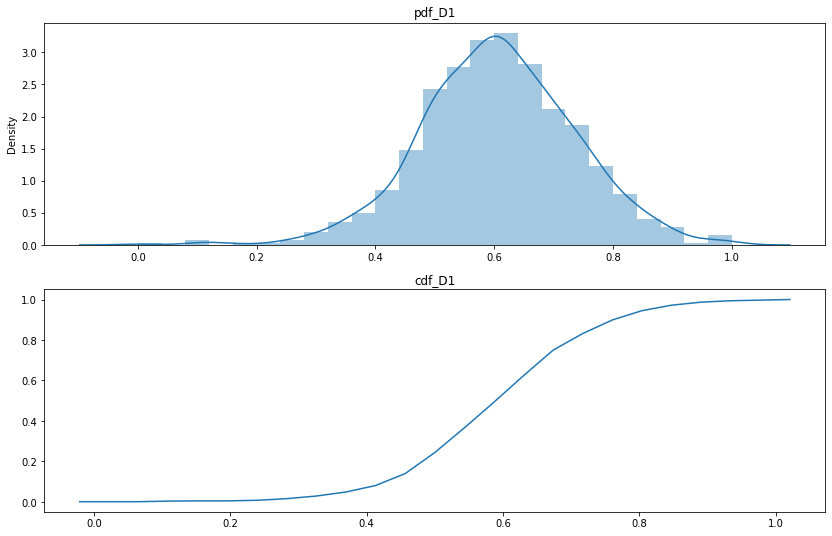

In [8]:
res_freq = stats.relfreq(normalize_D1, numbins=25)
pdf_D1 = res_freq.frequency

plt.figure(figsize=(14,9))

plt.subplot(211)
x = res_freq.lowerlimit + np.linspace(0, res_freq.binsize * res_freq.frequency.size, res_freq.frequency.size)
sns.distplot(normalize_D1, bins=25)
#plt.bar(x, pdf_D1, width=res_freq.binsize)
#plt.plot(x,pdf_D1,'r--',linewidth = 2.5)
plt.title('pdf_D1')

plt.subplot(212)
cdf_value = np.cumsum(res_freq.frequency)
plt.plot(x, cdf_value)
plt.title('cdf_D1')

Kolmogorov–Smirnov (KS) -test

In addition to observing from the figure above, we can use KS- to check whether D1 obeys a certain distribution, let's choose a confidence level of 95%, we will reject the null hypothesis in favor of the alternative if the p-value is less than 0.05. Calculate by pdf_D1.

For uniform distribution: 

H0: The samples are distributed according to uniformly.

H1: The samples are not distributed according to uniformly.

p-value < 0.05, so reject H0, D1 is not distributed according to uniformly.

In [9]:
stats.kstest(pdf_D1, stats.uniform.cdf)

KstestResult(statistic=0.869, pvalue=1.7544699046031433e-22)

For standard uniform distribution:

If a uniformly distributed random variable x~U[0,1], then the distribution is a standard uniform distribution.

Because that D1 is not a uniform distribution, as well as not a standard uniform distribution.

For normal distribution: 

H0: The samples are normal distribution.

H1: The samples are not normal distribution.

p-value > 0.05, so do not reject H0, D1 is normal distribution.

In [10]:
stats.kstest(pdf_D1, "norm", args = (pdf_D1.mean(),pdf_D1.std()))

KstestResult(statistic=0.22598342602374383, pvalue=0.13274727491555927)

For standard normal distribution:

If a normally distributed random variable x~Norm(0,1) that has a mean of 0 and a variance of 1, then the distribution is a standard normal distribution.

pdf_D1.mean = 0.04 and pdf_D1.var is around 0.001, so that is not a standard normal distribution.

In addition, we do normalization but not standardization, so the normal distribution in (0,1) can't be standard.

In [11]:
print("pdf_D1.mean=", pdf_D1.mean(), "pdf_D1.var=", np.var(pdf_D1))

pdf_D1.mean= 0.04 pdf_D1.var= 0.00217496


## 1.2 Image manipulation 

The image LenaGrey is formed by 512x512 pixels with intensity from 0 to 255

### 1.2.1 Import Lena_csv to show and see the image.

In [12]:
df = pd.read_csv("../input/lena-data/Lena.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,162,162,162,161,161,158,161,161,163,161,...,120,125,139,160,167,169,171,167,153,132
1,162,162,162,161,161,158,161,161,163,161,...,120,125,139,160,167,169,171,167,153,132
2,162,162,162,161,161,158,161,161,163,161,...,120,125,139,160,167,169,171,167,153,132
3,162,162,162,161,161,158,161,161,163,161,...,120,125,139,160,167,169,171,167,153,132
4,162,162,161,160,161,158,161,161,162,161,...,120,125,139,157,164,166,166,161,145,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,51,51,49,49,52,52,50,53,57,57,...,58,64,68,76,82,88,92,93,93,91
508,46,46,48,49,51,50,49,51,56,55,...,63,69,74,80,87,93,98,100,97,96
509,43,44,49,49,51,48,49,50,57,53,...,69,72,79,83,91,97,99,103,100,99
510,43,45,51,51,52,48,49,51,56,51,...,75,81,90,91,96,102,101,103,104,106


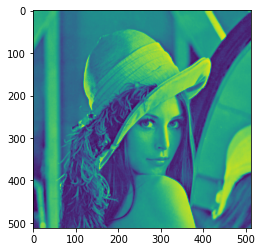

In [13]:
plt.imshow(df)
plt.savefig('Lena.png')

### 1.2.2 Calculate the mean, standard deviation, median, minimum, maximum, and mode of 262,144 (512x512)pixels.

Do for csv data, change df to 1-d array


In [14]:
data = np.array(df)
D1_data = data.reshape(262144)
D1_data

array([162, 162, 162, ..., 103, 105, 107])

In [15]:
print("mean=", np.mean(D1_data))
print("std=", np.std(D1_data))
print("median=", np.median(D1_data))
print("min=", np.min(D1_data))
print("max=", np.max(D1_data))
print("mode=", stats.mode(D1_data)[0][0])

mean= 123.54586410522461
std= 47.351301423725126
median= 128.0
min= 26
max= 238
mode= 155


### 1.2.3 Treats intensity as a horizontal coordinate, counts intensity values from 0 to 255 and plots the histogram.

Counts intensity values from 0 to 255.

In [16]:
nol_D1_data = 255*(D1_data-D1_data.min())/(D1_data.max()-D1_data.min())

#check
print("Check before normalization:")
print(D1_data.min(), "-", D1_data.max())
print("Check after min-max normalization in (0,255):")
print(nol_D1_data.min(), "-", nol_D1_data.max())

Check before normalization:
26 - 238
Check after min-max normalization in (0,255):
0.0 - 255.0


Put 262,144 pixels into 64 groups.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of 262,144 pixels in (0,255)')

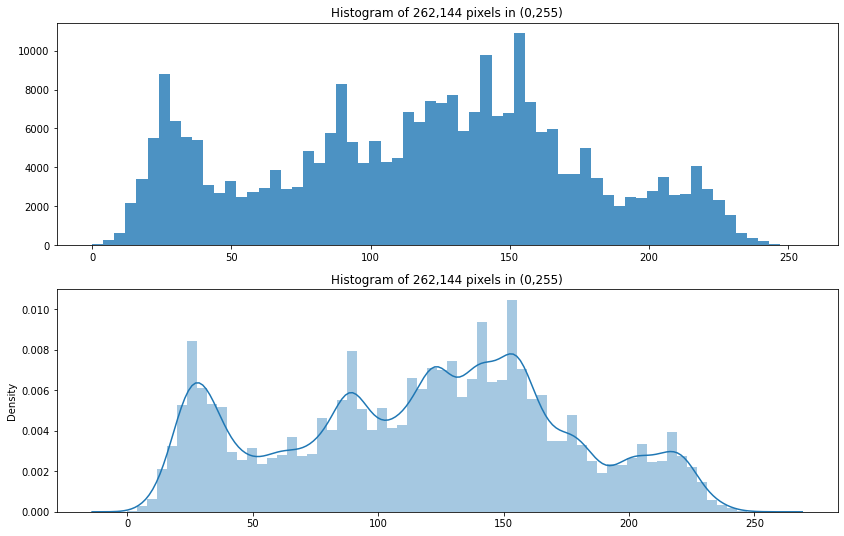

In [17]:
res_freq2 = stats.relfreq(nol_D1_data, numbins=64)
pdf_nol_D1_data = res_freq2.frequency

plt.figure(figsize=(14,9))

plt.subplot(211)
plt.hist(nol_D1_data,bins=64,histtype="bar",alpha=0.8)
plt.title('Histogram of 262,144 pixels in (0,255)')

plt.subplot(212)
x = res_freq2.lowerlimit + np.linspace(0, res_freq2.binsize * res_freq2.frequency.size, res_freq2.frequency.size)
sns.distplot(nol_D1_data, bins=64)
plt.title('Histogram of 262,144 pixels in (0,255)')

## 1.3 Image range reduction 

Partition image intensity range into several bins and check to see how the image appearance change 

In [18]:
img = Image.open("../input/lenapng/lena.png")

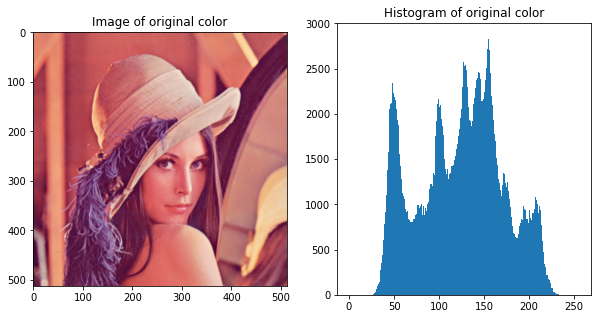

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Image of original color')
plt.imshow(img)

plt.subplot(122)
IMG_org = cv2.imread('../input/lenapng/lena.png',0)
plt.hist(IMG_org.ravel(),256,[0,256])
plt.title('Histogram of original color')

plt.show()

Convert to grayscale.

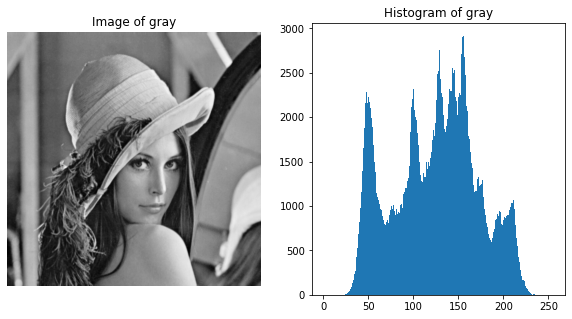

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(121)
img_gray = img.convert('L')
plt.title('Image of gray')
plt.imshow(img_gray, cmap='gray')
plt.axis("off")
img_gray.save("gray.jpg")

plt.subplot(122)
IMG_g = cv2.imread('./gray.jpg',0)
plt.hist(IMG_g.ravel(),256,[0,256])
plt.title('Histogram of gray')

plt.show()

### 1.3.1 Partition image intensity into 2 bins, i.e., change the image to 1 bit image (binary image)

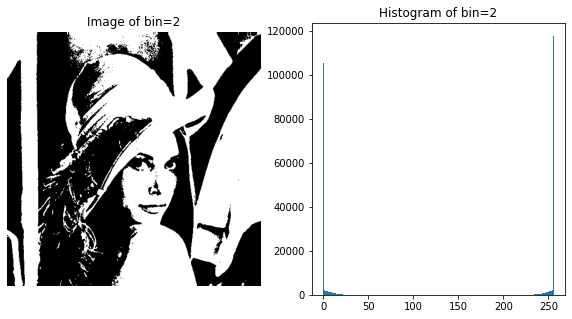

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(121)
img_banary = np.array(img_gray)
img_banary = np.where(img_banary[...,:]<127, 0, 255)
img_banary = img_banary.astype(np.uint8)
img_banary1 = Image.fromarray(img_banary)
plt.title('Image of bin=2')
plt.imshow(img_banary1, cmap='gray')
plt.axis("off")
img_banary1.save("banary.jpg")

plt.subplot(122)
IMG_b = cv2.imread('./banary.jpg',0)
plt.hist(IMG_b.ravel(),256,[0,256])
plt.title('Histogram of bin=2')

plt.show()

### 1.3.2 Partition image intensity into 3. 4, 5, 6, 7 bins to check image quality change compared with the original Lena image (8 bit image with intensity range from 0 to 2^8-1=255).

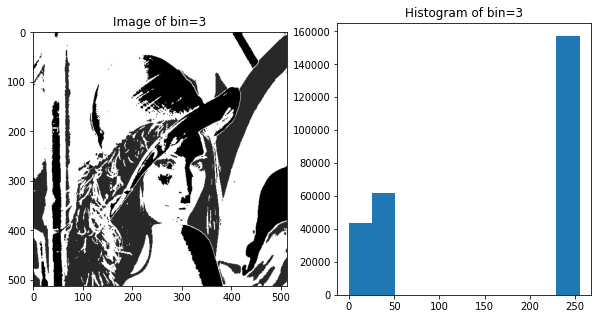

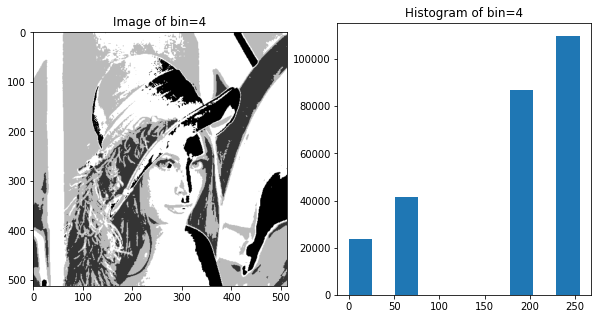

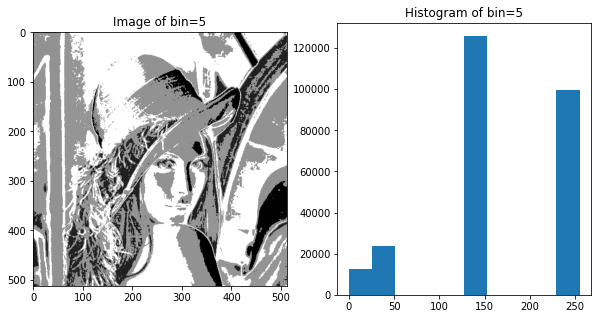

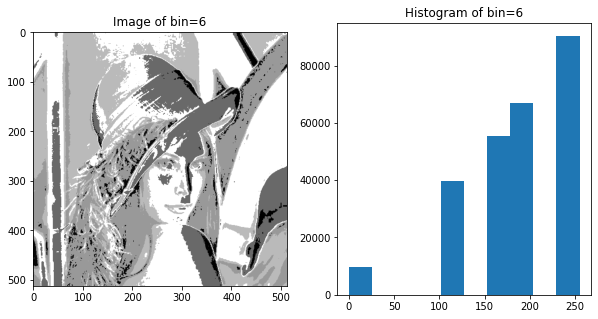

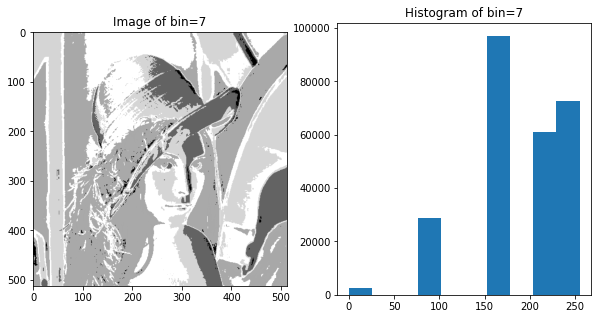

In [22]:
def intensity_bins_to_image (histSize):
    hist = cv2.calcHist([IMG_g],[0],None,[histSize],[0,256])
    cv2.normalize(hist, hist, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX)
    backproj = cv2.calcBackProject([IMG_g],[0],hist,[0,256],scale = 1)
    return backproj

    

for i in range (3,8): 
    histSize = i
    Backproj = intensity_bins_to_image (histSize)
    plt.figure(figsize=(10,5))

    plt.subplot(121)
    plt.title(f'Image of bin={i}')
    plt.imshow(Backproj, cmap='gray')

    plt.subplot(122)
    Backproj_h = Backproj.reshape(262144)
    plt.hist(Backproj_h)
    
    plt.title(f'Histogram of bin={i}')
    
    plt.show()
    
    i+=1

For ease of observation, we use cmap='gray' to exclude color effects, and all images are completed on the basis of grayscale images.

Comparing the original image, we can find that the more bins, the more gray levels the image has, and the smaller the bin, the closer to the black-white image (that is, bin=2), which also proves that the bin represents the division of intensity